<a href="https://www.kaggle.com/code/hirdayeshraghav/store-file-sql?scriptVersionId=117929722" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-file/data.sqlite
/kaggle/input/store-124/Store.csv
/kaggle/input/hirdayesh/Data_analysis.sql


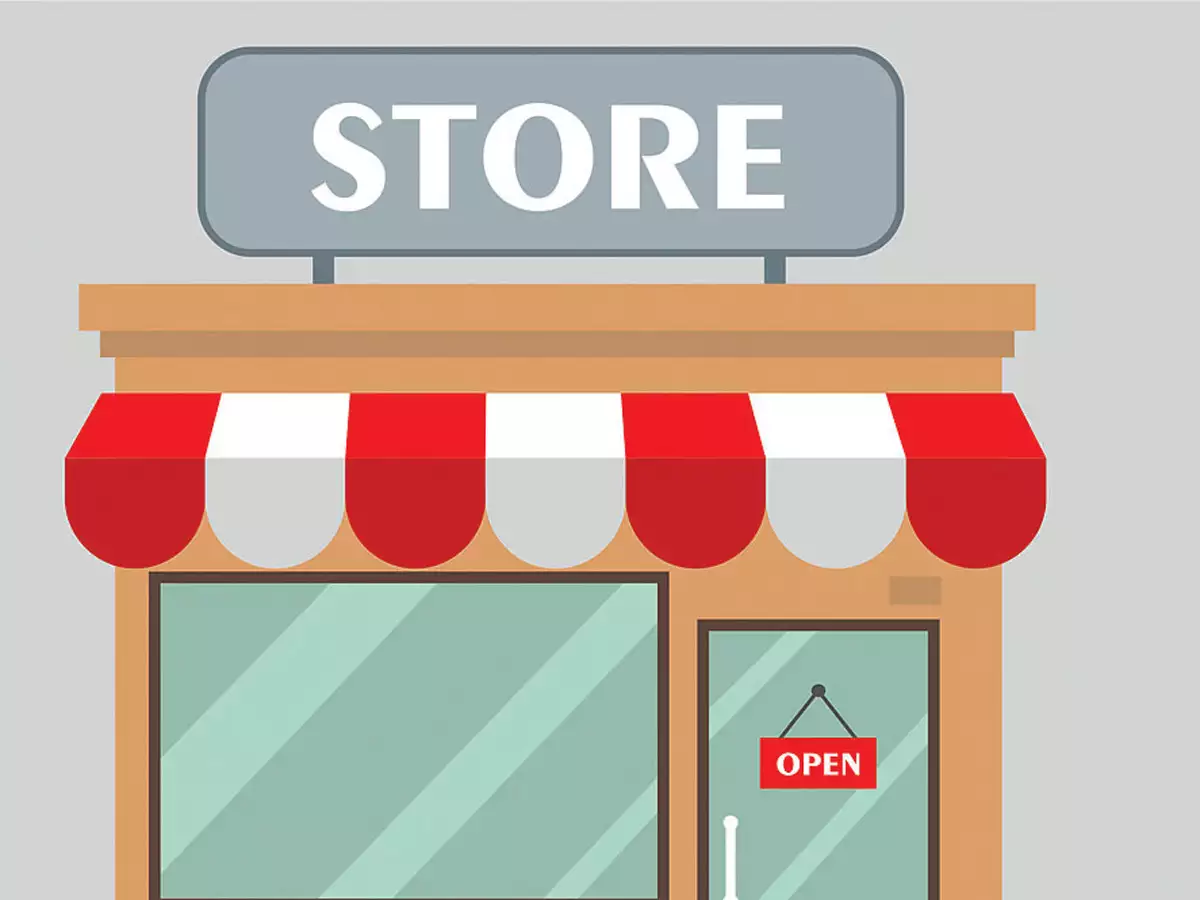

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Connecting the database

In [3]:
db="/kaggle/input/store-file/data.sqlite"
conn=sqlite3.connect(db)

In [4]:
table=pd.read_sql("SELECT * FROM sqlite_master where type='table'",conn)

In [5]:
table



,type,name,tbl_name,rootpage,sql
0,table,Store,Store,2,"CREATE TABLE `Store` (`Row_ID`, `Order_ID`, `O..."


In [6]:
store_table=pd.read_sql("SELECT * FROM Store",conn)


#  Dataset Information


In [7]:
store_table

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,54.5472,2013,old customer,Not Returned,Not Returned
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,GBC Standard Plastic Binding Systems Combs,3.54,2,0.8,-5.487,2.832,2013,old customer,Not Returned,Not Returned
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.884,3.9072,2013,old customer,Not Returned,Not Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,908,CA-2014-143259,2016-12-30,2017-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Gear Head AU3700S Headset,90.93,7,0,2.7279,0,2016,old customer,Not Returned,Not Returned
9985,909,CA-2014-143259,2016-12-30,2017-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.791,10.5552,2016,old customer,Not Returned,Not Returned
9986,1297,CA-2014-115427,2016-12-30,2017-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,2.7808,2016,old customer,Returned,Product Description Inaccurate
9987,1298,CA-2014-115427,2016-12-30,2017-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,GBC Binding covers,20.72,2,0.2,6.475,4.144,2016,old customer,Returned,Product Description Inaccurate


In [8]:
#Row count of data
Row_Count=pd.read_sql("SELECT Count(*) AS ROW_count FROM STORE",conn)


In [9]:
Row_Count

,ROW_count
0,9989


In [10]:
#Database Column_Count
Column_dataset=pd.read_sql("SELECT COUNT(*) AS column_Count FROM Store",conn)
Column_dataset

,column_Count
0,9989


In [11]:
#Unique product categories
unique=pd.read_sql("select distinct (Category) from store",conn)
unique

,Category
0,Office Supplies
1,Furniture
2,Technology


In [12]:
Sub_cat=pd.read_sql("select count(distinct (Sub_Category)) As No_of_Sub_Categories from store",conn)
Sub_cat

,No_of_Sub_Categories
0,17


In [13]:
Products_sub=pd.read_sql("SELECT Sub_Category, count(*) As No_of_products FROM store GROUP BY Sub_Category order by  count(*) desc",conn)
Products_sub

,Sub_Category,No_of_products
0,Binders,1522
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846
5,Art,796
6,Accessories,775
7,Chairs,617
8,Appliances,462
9,Labels,364


#  Analysing the Data 

In [14]:
# number of unique product names
names=pd.read_sql("select count(distinct (Product_Name)) As No_of_unique_products from store",conn)

names

,No_of_unique_products
0,1849


In [15]:
# Top 10 Products that are ordered frequently
product_10=pd.read_sql("SELECT Product_Name, count(*) AS No_of_products FROM store GROUP BY Product_Name order by  count(*) desc limit 10",conn)
product_10

,Product_Name,No_of_products
0,Staple envelope,48
1,Staples,46
2,Easy-staple paper,46
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,19
5,Staple remover,18
6,KI Adjustable-Height Table,18
7,Storex Dura Pro Binders,17
8,Staple-based wall hangings,16
9,"Situations Contoured Folding Chairs, 4/Set",15


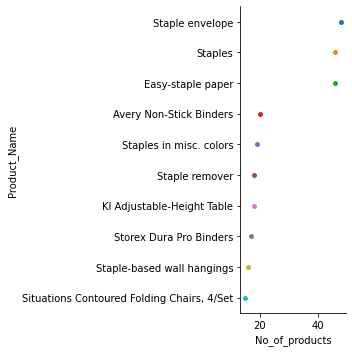

In [16]:
sns.catplot(data=product_10, y="Product_Name", x="No_of_products", kind="swarm")
plt.show()


Staple envlope is maximum order product.

In [17]:
#The cost for each Order_ID with respective Product Name.
Sales=pd.read_sql("select Order_Id,Product_Name,ROUND(CAST((sales-profit) AS NUMERIC), 2)AS cost from store",conn)
Sales

,Order_ID,Product_Name,cost
0,CA-2011-103800,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",10.90
1,CA-2011-112326,Avery 508,7.51
2,CA-2011-112326,SAFCO Boltless Steel Shelving,337.51
3,CA-2011-112326,GBC Standard Plastic Binding Systems Combs,9.03
4,CA-2011-141817,Avery Hi-Liter EverBold Pen Style Fluorescent ...,14.65
...,...,...,...
9984,CA-2014-143259,Gear Head AU3700S Headset,88.20
9985,CA-2014-143259,Wilson Jones Legal Size Ring Binders,32.99
9986,CA-2014-115427,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",9.39
9987,CA-2014-115427,GBC Binding covers,14.25


In [18]:
#Calculate % profit for each Order_ID with respective Product Name.
profit=pd.read_sql("select Order_Id,Product_Name,ROUND(CAST((profit/((sales-profit))*100)AS NUMERIC),2) as percentage_profit  from store",conn)
profit



,Order_ID,Product_Name,percentage_profit
0,CA-2011-103800,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",50.94
1,CA-2011-112326,Avery 508,56.86
2,CA-2011-112326,SAFCO Boltless Steel Shelving,-19.19
3,CA-2011-112326,GBC Standard Plastic Binding Systems Combs,-60.78
4,CA-2011-141817,Avery Hi-Liter EverBold Pen Style Fluorescent ...,33.33
...,...,...,...
9984,CA-2014-143259,Gear Head AU3700S Headset,3.09
9985,CA-2014-143259,Wilson Jones Legal Size Ring Binders,60.00
9986,CA-2014-115427,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",48.15
9987,CA-2014-115427,GBC Binding covers,45.45


In [19]:
# Calculate the overall profit of the store.
overall_profit=pd.read_sql("Select ROUND(CAST(((SUM(profit)/((sum(sales)-sum(profit))))*100)AS NUMERIC),2) as percentage_profit  from store",conn)
overall_profit

,percentage_profit
0,14.24


In [20]:
percentage=pd.read_sql("select  order_id,Product_Name,((profit/((sales-profit))*100)) as percentage_profit from store group by order_id,Product_Name,percentage_profit",conn)
percentage

,Order_ID,Product_Name,percentage_profit
0,CA-2011-100006,AT&T EL51110 DECT,40.845070
1,CA-2011-100090,Hon 2111 Invitation Series Corner Table,-14.893617
2,CA-2011-100090,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",53.846154
3,CA-2011-100293,Xerox 1887,53.846154
4,CA-2011-100328,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",50.943396
...,...,...,...
9978,US-2014-169551,Apple iPhone 5S,-14.285714
9979,US-2014-169551,O'Sullivan 3-Shelf Heavy-Duty Bookcases,-34.210526
9980,US-2014-169551,Plantronics CS510 - Over-the-Head monaural Wir...,19.402985
9981,US-2014-169551,Plastic Stacking Crates & Casters,8.108108


In [21]:
Avg_Sales=pd.read_sql("SELECT round(cast(AVG(sales) as numeric),2) AS avg_sales FROM store",conn)
Avg_Sales

,avg_sales
0,229.83


In [22]:
AVG_PROFIT=pd.read_sql("SELECT round(cast(AVG(Profit)as numeric),2) AS avg_profit FROM store;",conn)

AVG_PROFIT

,avg_profit
0,28.65


In [23]:
AVG_SUB=pd.read_sql("SELECT round(cast(AVG(sales) as numeric),2) AS avg_sales, Sub_Category FROM store GROUP BY Sub_Category ORDER BY avg_sales asc limit 9",conn)
AVG_SUB

,avg_sales,Sub_Category
0,13.94,Fasteners
1,34.07,Art
2,34.30,Labels
3,57.28,Paper
4,64.87,Envelopes
5,95.83,Furnishings
6,133.64,Binders
7,215.97,Accessories
8,229.77,Appliances


In [24]:
AVG_SUB_CAT=pd.read_sql("SELECT round(cast(AVG(Profit)as numeric),2) AS avg_prof,Sub_Category FROM store GROUP BY Sub_Category ORDER BY avg_prof asc limit 11",conn)
AVG_SUB_CAT

,avg_prof,Sub_Category
0,-55.57,Tables
1,-15.23,Bookcases
2,-6.26,Supplies
3,4.38,Fasteners
4,8.20,Art
5,13.65,Furnishings
6,15.24,Labels
7,19.85,Binders
8,24.86,Paper
9,25.15,Storage


In [25]:
#The number of unique customer IDs.
Unique_customerID=pd.read_sql("select count(distinct (Customer_id)) as no_of_unique_custd_ID from store",conn)
Unique_customerID

,no_of_unique_custd_ID
0,793


In [26]:
#Those customers who registered during 2014-2016.
customer=pd.read_sql("select distinct (Customer_Name), Customer_ID, Order_ID,city, Postal_Code from store where Customer_Id is not null",conn)
customer

,Customer_Name,Customer_ID,Order_ID,City,Postal_Code
0,Darren Powers,DP-13000,CA-2011-103800,Houston,77095
1,Phillina Ober,PO-19195,CA-2011-112326,Naperville,60540
2,Mick Brown,MB-18085,CA-2011-141817,Philadelphia,19143
3,Lycoris Saunders,LS-17230,CA-2011-130813,Los Angeles,90049
4,Jack O'Briant,JO-15145,CA-2011-106054,Athens,30605
...,...,...,...,...,...
5002,Katherine Hughes,KH-16360,US-2014-158526,Louisville,40214
5003,Chuck Clark,CC-12430,CA-2014-126221,Columbus,47201
5004,Patrick O'Donnell,PO-18865,CA-2014-143259,New York City,10009
5005,Erica Bern,EB-13975,CA-2014-115427,Fairfield,94533


In [27]:
#Total Frequency of each order id by each customer Name in descending order.
order=pd.read_sql("select order_id, customer_name, count(Order_Id) as total_order_id from store group by order_id,customer_name order by total_order_id desc",conn)
order

,Order_ID,Customer_Name,total_order_id
0,CA-2014-100111,Seth Vernon,14
1,CA-2014-157987,Ann Chong,12
2,CA-2013-165330,William Brown,11
3,US-2013-108504,Paul Prost,11
4,CA-2012-131338,Naresj Patel,10
...,...,...,...
5002,US-2014-166611,Cyma Kinney,1
5003,US-2014-167570,Emily Grady,1
5004,US-2014-168613,Gary McGarr,1
5005,US-2014-168690,Thais Sissman,1


In [28]:
#Cost of each customer name.
name=pd.read_sql("select order_id, customer_id, customer_Name, City, Quantity,sales,(sales-profit) as costs,profit from store group by Customer_Name,order_id,customer_id,City,Quantity,Costs,sales,profit",conn)
name

,Order_ID,Customer_ID,Customer_Name,City,Quantity,Sales,costs,Profit
0,CA-2011-152905,AB-10015,Aaron Bergman,Arlington,2,12.624,15.1488,-2.5248
1,CA-2011-156587,AB-10015,Aaron Bergman,Seattle,1,48.712,43.2319,5.4801
2,CA-2011-156587,AB-10015,Aaron Bergman,Seattle,3,17.94,13.2756,4.6644
3,CA-2011-156587,AB-10015,Aaron Bergman,Seattle,3,242.94,238.0812,4.8588
4,CA-2013-140935,AB-10015,Aaron Bergman,Oklahoma City,2,221.98,159.8256,62.1544
...,...,...,...,...,...,...,...,...
9983,CA-2013-152471,ZD-21925,Zuschuss Donatelli,Jacksonville,5,823.96,772.4625,51.4975
9984,CA-2013-167682,ZD-21925,Zuschuss Donatelli,Richmond,4,71.12,49.0728,22.0472
9985,CA-2013-167682,ZD-21925,Zuschuss Donatelli,Richmond,4,259.96,135.1792,124.7808
9986,CA-2014-141481,ZD-21925,Zuschuss Donatelli,Los Angeles,3,61.44,44.8512,16.5888


In [29]:
#Top 10 customers who order frequently.
cust_order=pd.read_sql("SELECT Customer_Name, count(*) as no_of_order FROM store GROUP BY Customer_Name order by  count(*) desc limit 10",conn)
cust_order

,Customer_Name,no_of_order
0,William Brown,37
1,Paul Prost,34
2,Matt Abelman,34
3,John Lee,34
4,Seth Vernon,32
5,Jonathan Doherty,32
6,Edward Hooks,32
7,Chloris Kastensmidt,32
8,Zuschuss Carroll,31
9,Emily Phan,31


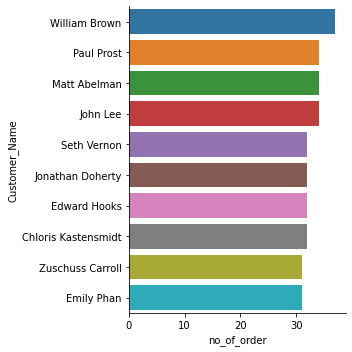

In [30]:
sns.catplot(data=cust_order, kind="bar", x="no_of_order", y="Customer_Name")
plt.show()


William Brown is  an exceptional customer as he is one top buyer from the store.

In [31]:
states=pd.read_sql(" select * from store where States= 'California' and Postal_Code='90032'",conn)
states

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,6,CA-2011-115812,2013-06-09,2013-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0,14.1694,0,2013,old customer,Not Returned,Not Returned
1,7,CA-2011-115812,2013-06-09,2013-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Newell 322,7.28,4,0,1.9656,0,2013,old customer,Not Returned,Not Returned
2,8,CA-2011-115812,2013-06-09,2013-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,181.4304,2013,old customer,Not Returned,Not Returned
3,9,CA-2011-115812,2013-06-09,2013-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,3.7008,2013,old customer,Not Returned,Not Returned
4,10,CA-2011-115812,2013-06-09,2013-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Belkin F5C206VTEL 6 Outlet Surge,114.9,5,0,34.47,0,2013,old customer,Not Returned,Not Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2350,CA-2014-109701,2016-12-02,2016-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,...,Satellite Sectional Post Binders,69.456,2,0.2,22.5732,13.8912,2016,old customer,Not Returned,Not Returned
104,2351,CA-2014-109701,2016-12-02,2016-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,...,"Wirebound Message Book, 4 per Page",10.86,2,0,5.3214,0,2016,old customer,Not Returned,Not Returned
105,2352,CA-2014-109701,2016-12-02,2016-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,...,Fellowes Advanced Computer Series Surge Protec...,79.47,3,0,22.2516,0,2016,old customer,Not Returned,Not Returned
106,2353,CA-2014-109701,2016-12-02,2016-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,...,Prang Dustless Chalk Sticks,10.08,6,0,5.04,0,2016,old customer,Not Returned,Not Returned


In [32]:
#Top 20 Customers who benefitted the store.
Store_profit=pd.read_sql("SELECT Customer_Name, Profit, City, States FROM store GROUP BY Customer_Name,Profit,City,States order by  Profit desc limit 20",conn)
Store_profit

,Customer_Name,Profit,City,States
0,David Flashing,99.9408,New York City,New York
1,Richard Bierner,99.9408,San Diego,California
2,Becky Martin,99.9012,Santa Barbara,California
3,Helen Wasserman,99.4896,New York City,New York
4,Gary Zandusky,99.432,Rio Rancho,New Mexico
5,Harold Ryan,99.432,Gilbert,Arizona
6,Stephanie Phelps,99.296,Stockton,California
7,Dan Reichenbach,99.23,Inglewood,California
8,Jenna Caffey,99.23,Kent,Washington
9,Andrew Allen,98.5248,Detroit,Michigan


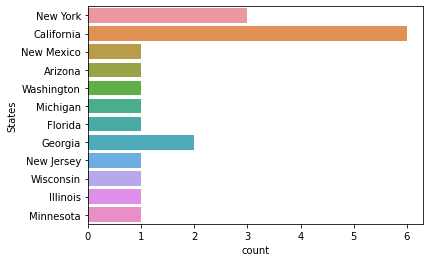

In [33]:
sns.countplot(y=Store_profit["States"])
plt.show()

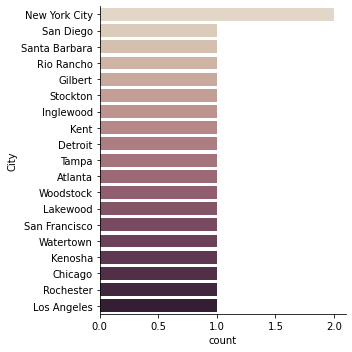

In [34]:
sns.catplot(data=Store_profit, y="City", kind="count", palette="ch:.25")
plt.show()

In [35]:
orders=pd.read_sql("select count(distinct (Order_ID)) as no_of_unique_orders from store",conn)

In [36]:
orders


,no_of_unique_orders
0,5007


In [37]:
superstore=pd.read_sql("select round(cast(SUM(sales) as numeric),2) as Total_Sales from store",conn)
superstore

,Total_Sales
0,2295810.15


In [38]:
Sales_impact=pd.read_sql("select count(Order_ID) as Purchases,round(cast(sum(Sales)as numeric),2) as Total_Sales, round(cast(sum(((profit/((sales-profit))*100)))/ count(*)as numeric),2) as avg_percentage_profit, min(Order_date) as first_purchase_date,max(Order_date) as Latest_purchase_date, count(distinct(Product_Name)) as Products_Purchased, count(distinct(City)) as Location_count from store",conn)
Sales_impact


,Purchases,Total_Sales,avg_percentage_profit,first_purchase_date,Latest_purchase_date,Products_Purchased,Location_count
0,9989,2295810.15,32.35,2013-01-03,2016-12-30,1849,531


In [39]:
#Return
Return_item=pd.read_sql("select Returned_items, count(Returned_items)as Returned_Items_Count from store group by Returned_items Having Returned_items='Returned'",conn)
Return_item



,Returned_Items,Returned_Items_Count
0,Returned,800


In [40]:
#Top 10 Returned Categories.
Returned=pd.read_sql("SELECT Returned_items, Count(Returned_items) as no_of_returned ,Category, Sub_Category FROM store GROUP BY Returned_items,Category,Sub_Category Having Returned_items='Returned' ORDER BY count(Returned_items) DESC limit 10",conn)
Returned



,Returned_Items,no_of_returned,Category,Sub_Category
0,Returned,137,Office Supplies,Binders
1,Returned,123,Office Supplies,Paper
2,Returned,77,Technology,Phones
3,Returned,72,Furniture,Furnishings
4,Returned,61,Technology,Accessories
5,Returned,57,Office Supplies,Storage
6,Returned,53,Furniture,Chairs
7,Returned,47,Office Supplies,Art
8,Returned,40,Office Supplies,Appliances
9,Returned,30,Furniture,Tables


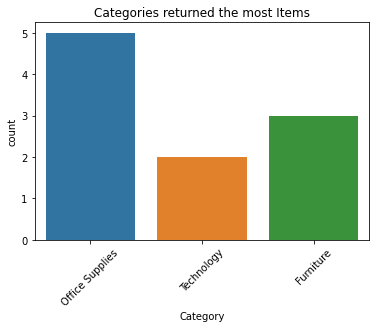

In [41]:
sns.countplot(Returned["Category"])
plt.title("Categories returned the most Items")
plt.xticks(rotation=45)
plt.show()

This graph evaluates that maximum return occurs in the Office Supplies then  comes Furniture.


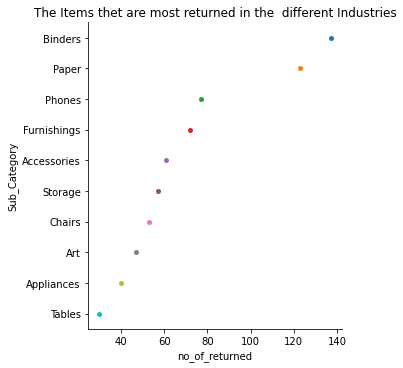

In [42]:
sns.catplot(data=Returned, y="Sub_Category", x="no_of_returned", jitter=False)
plt.title("The Items thet are most returned in the  different Industries")
plt.show()

Binders are one of most returned items under Sub_category.

In [43]:
#Top 10 Customers Returned Frequently.
Returned_Frequently=pd.read_sql("SELECT Returned_items, Count(Returned_items) As Returned_Items_Count, Customer_Name, Customer_ID,Customer_duration, States,City FROM store GROUP BY Returned_items,Customer_Name, Customer_ID,customer_duration,states,city Having Returned_items='Returned' ORDER BY Count(Returned_items) DESC limit 10",conn)
Returned_Frequently

,Returned_Items,Returned_Items_Count,Customer_Name,Customer_ID,Customer_Duration,States,City
0,Returned,14,Seth Vernon,SV-20365,old customer,New York,New York City
1,Returned,11,William Brown,WB-21850,old customer,California,Anaheim
2,Returned,10,Clay Ludtke,CL-12565,old customer,California,Los Angeles
3,Returned,9,Sandra Glassco,SG-20080,old customer,California,Redlands
4,Returned,8,Dan Reichenbach,DR-12880,old customer,California,Inglewood
5,Returned,8,Resi P�lking,RP-19390,old customer,Washington,Seattle
6,Returned,8,Stefania Perrino,SP-20620,old customer,Pennsylvania,Philadelphia
7,Returned,7,Adrian Hane,AH-10120,old customer,Oregon,Salem
8,Returned,7,Anthony Johnson,AJ-10795,old customer,California,San Francisco
9,Returned,7,Darrin Martin,DM-13015,old customer,New York,New York City


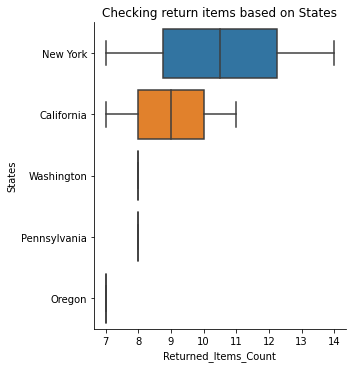

In [44]:
sns.catplot(data=Returned_Frequently, x="Returned_Items_Count", y="States", kind="box")
plt.title("Checking return items based on States")
plt.show()

The given dataset of USA cities and graph plotted shows that NewYork has returning items followed by California.  

In [45]:
#Find Top 20 cities and states having higher return.
Cities_states_return=pd.read_sql("SELECT Returned_items, Count(Returned_items)as Returned_Items_Count,States,City FROM store GROUP BY Returned_items,states,city Having Returned_items='Returned' ORDER BY Count(Returned_items) DESC limit 20",conn)
Cities_states_return

,Returned_Items,Returned_Items_Count,States,City
0,Returned,117,California,Los Angeles
1,Returned,64,California,San Francisco
2,Returned,60,Washington,Seattle
3,Returned,45,New York,New York City
4,Returned,18,California,San Diego
5,Returned,16,Arizona,Phoenix
6,Returned,13,Pennsylvania,Philadelphia
7,Returned,12,California,Brentwood
8,Returned,12,Illinois,Chicago
9,Returned,12,Oregon,Salem


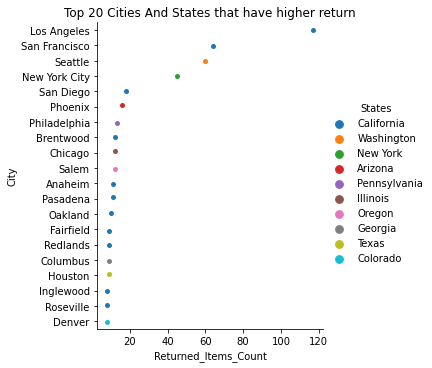

In [46]:
sns.catplot(x="Returned_Items_Count",y="City",hue="States",data=Cities_states_return)
plt.title("Top 20 Cities And States that have higher return")
plt.show()

This graph shows Cities and Sates that have high ordering products where Los Angeles Tops .


In [47]:
#Check whether new customers are returning higher or not.\
New_Customers=pd.read_sql("SELECT Returned_items, Count(Returned_items)as Returned_Items_Count,Customer_duration FROM store GROUP BY Returned_items,Customer_duration Having Returned_items='Returned' ORDER BY Count(Returned_items) DESC limit 20",conn)
New_Customers

,Returned_Items,Returned_Items_Count,Customer_Duration
0,Returned,796,old customer
1,Returned,4,new customer


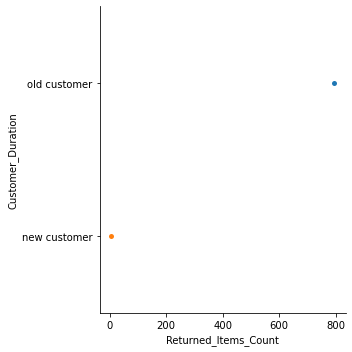

In [48]:

sns.catplot(data=New_Customers, x="Returned_Items_Count", y="Customer_Duration", kind="swarm")
plt.show()

Old/Regular customer are usually returning the items than the new customer.

In [49]:
#Find Top  Reasons for returning.
Reasons_returning=pd.read_sql("SELECT Returned_items, Count(Returned_items)as Returned_Items_Count,return_reason FROM store GROUP BY Returned_items,return_reason Having Returned_items='Returned' ORDER BY Count(Returned_items) DESC",conn)
Reasons_returning


,Returned_Items,Returned_Items_Count,Return_Reason
0,Returned,304,Product Description Inaccurate
1,Returned,158,Customer Dissatified With Product
2,Returned,100,Product Arrived After Promised Delivery Date
3,Returned,90,Product Damaged
4,Returned,81,Product Ordered Accidently
5,Returned,67,Incorrect Products Delivered


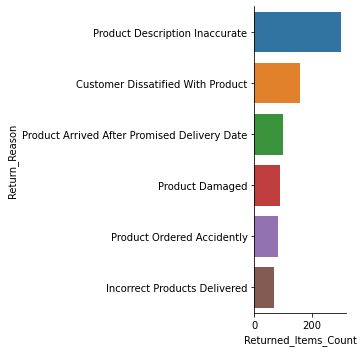

In [50]:

sns.catplot(data=Reasons_returning, x="Returned_Items_Count", y="Return_Reason", kind="bar")
plt.show()

Returning reason of a product was Product Description inaccurate > Customer Dissatified with product so on..